Keras 的模型建立分兩種：

- Sequential model：一層層順序執行的簡單模型，只有第一層要寫input的規格，其他層的input就是上一層的output。
- Functional API model：可以有多個 input 層或 output 層，結構可以有分叉，適合複雜的模型建立。

In [1]:
import tensorflow as tf


# Sequential model

In [2]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


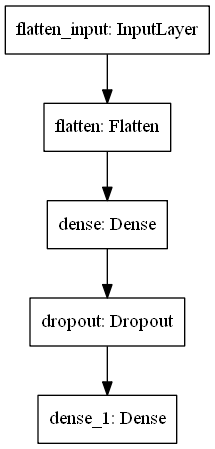

In [3]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')

# Functional API model

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


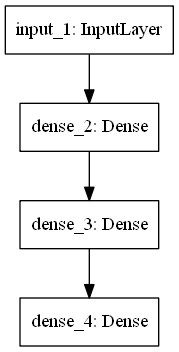

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

InputTensor = tf.keras.Input(shape=(100,))
H1 = Dense(10, activation='relu')(InputTensor)
H2 = Dense(20, activation='relu')(H1)
Output = Dense(1, activation='softmax')(H2)

model_API = Model(inputs=InputTensor, outputs=Output)

model_API.summary()

from keras.utils import plot_model
tf.keras.utils.plot_model(model_API, to_file='Functional_API_model.png')


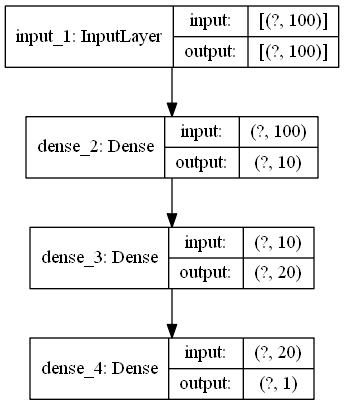

In [5]:
# show_shapes=True：Layer 含 Input/Output 資訊
tf.keras.utils.plot_model(model_API, "Functional_API_model_with_shape_info.png", show_shapes=True)

## 有分叉的 Functional API model
3個Input及2個Output，中間2個LSTM與1個Input合併

In [7]:
from tensorflow.keras import layers
from tensorflow import keras

num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

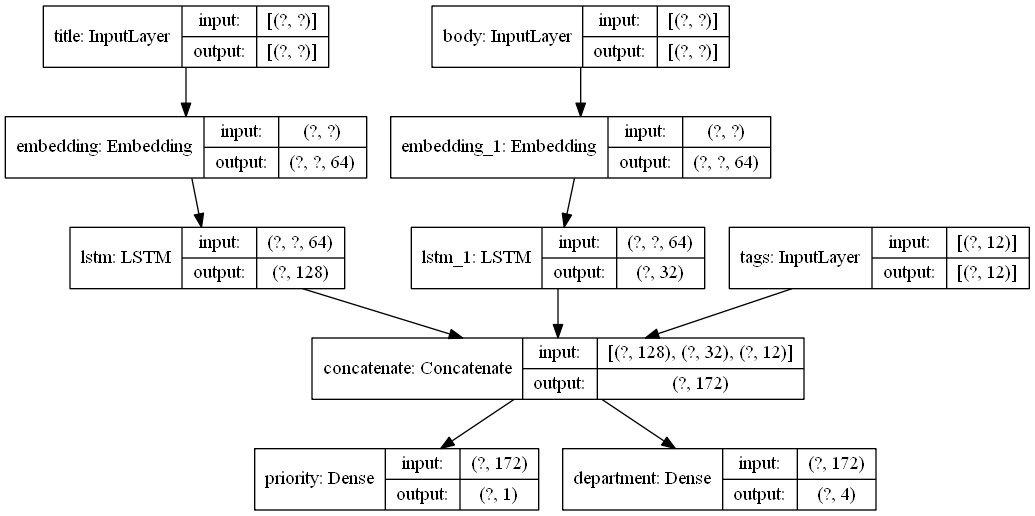

In [8]:
# show_shapes=True：Layer 含 Input/Output 資訊
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)